# **preprocessing the data**

### **load data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn import preprocessing
from sklearn import tree

In [2]:
#load the dataset
data = pd.read_csv('/content/drive/MyDrive/Complaints(2).csv')

In [3]:
#examine the data
data.head(10)

,CASE_ID,OFFER_NAME,CUSTOMER_TYPE,CUSTOMER_GROUP,CURRENT_STATUS,ESCALATION_FLAG,ESCALATED_GROUP,OPEN_DATE,OPEN_USER,CLOSE_DATE,...,AGE_BRACKET,ACTUAL_COMPLAINT,CALLBACK_MECHANISM,RESOLUTION,RESOLUTION_DESCRIPTION,CASE_DESC,OPEN_GR,COMPLAINT_TYPE,PRODUCT,CASE
0,CAS-1060890-L3D6Q6,FTTH Home,CBU,FTTH Home,Resolved,Yes,F&I_BO,19.06.2022 06:07,DANA,21.06.2022 13:41,...,2.0,Actual Complaint,Phone,NaN,NaN,NaN,CBU / EBU - personal view,Technical,Internet,Technical complaint
1,CAS-388567-W4B9Q3,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,04.04.2022 14:11,TCRMService,05.04.2022 12:13,...,1.0,Not Actual Complaint,Phone,NaN,NaN,NaN,System Administrator,Commercial,Mobile,Commercial claim
2,CAS-1494939-L9F0X7,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,03.08.2022 03:20,MOUTAZ,03.08.2022 03:20,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
3,CAS-1059985-K3Y9F7,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,18.06.2022 20:38,MOATH,18.06.2022 20:38,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,NaN,Technical,Internet,Technical complaint
4,CAS-1239942-Y1S2F5,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,06.07.2022 01:22,IBRAHIM,06.07.2022 01:22,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint
5,CAS-715425-V1C0Z7,Eagle Army Cell,CBU,Prepaid,Resolved,Yes,Mobile_BO,5/13/2022 14:11,IMAN,5/18/2022 6:20,...,4.0,Actual Complaint,Phone,NaN,NaN,NaN,CBU - CC 1st Layer,Technical,Mobile,OM_CLAIM
6,CAS-515407-M8K8P2,FTTH Home,CBU,FTTH Home,Resolved,No,NaN,19.04.2022 13:54,AYMAN,19.04.2022 13:54,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 2nd Layers,Technical,Internet,Technical complaint
7,CAS-1402363-R0K4K0,NaN,CBU,NaN,Resolved,Yes,Mobile_BO,25.07.2022 03:09,TCRMService,27.07.2022 17:58,...,2.0,Actual Complaint,Phone,NaN,NaN,NaN,System Administrator,Commercial,Mobile,Commercial claim
8,CAS-1854074-P7M0Q4,Bitstream Home,CBU,Wanadoo-ADSL-Res,Resolved,No,NaN,12.09.2022 09:30,NOOR,12.09.2022 09:30,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,NaN,Technical,Internet,Technical complaint
9,CAS-559405-J7W1N9,FTTB Corporate,EBU,FTTB Corporate,Resolved,No,NaN,24.04.2022 11:29,YASMEEN,24.04.2022 11:29,...,1.0,User Not Filled,NaN,NaN,NaN,NaN,CBU - CC 1st Layer A,Technical,Internet,Technical complaint


In [4]:
#check number of rows, cols and dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10415 entries, 0 to 10414
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CASE_ID                 10415 non-null  object 
 1   OFFER_NAME              9122 non-null   object 
 2   CUSTOMER_TYPE           10415 non-null  object 
 3   CUSTOMER_GROUP          9067 non-null   object 
 4   CURRENT_STATUS          10415 non-null  object 
 5   ESCALATION_FLAG         10415 non-null  object 
 6   ESCALATED_GROUP         3360 non-null   object 
 7   OPEN_DATE               10415 non-null  object 
 8   OPEN_USER               10053 non-null  object 
 9   CLOSE_DATE              10296 non-null  object 
 10  CLOSE_GROUP             5525 non-null   object 
 11  CLOSE_USER              9899 non-null   object 
 12  AGE_BRACKET             10296 non-null  float64
 13  ACTUAL_COMPLAINT        10415 non-null  object 
 14  CALLBACK_MECHANISM      3138 non-null 

### **check the null values**

In [5]:
data.isnull().sum()

CASE_ID                       0
OFFER_NAME                 1293
CUSTOMER_TYPE                 0
CUSTOMER_GROUP             1348
CURRENT_STATUS                0
ESCALATION_FLAG               0
ESCALATED_GROUP            7055
OPEN_DATE                     0
OPEN_USER                   362
CLOSE_DATE                  119
CLOSE_GROUP                4890
CLOSE_USER                  516
AGE_BRACKET                 119
ACTUAL_COMPLAINT              0
CALLBACK_MECHANISM         7277
RESOLUTION                10336
RESOLUTION_DESCRIPTION    10376
CASE_DESC                  9243
OPEN_GR                    4561
COMPLAINT_TYPE                0
PRODUCT                       0
CASE                          0
dtype: int64

###**drop the obstacle columns**

In [6]:
# ill drop these columns due to the fact that they are almost all null values 
# and the case id will get in the way of the preprocessing so ill drop it too
data.drop('CALLBACK_MECHANISM', inplace=True, axis=1)
data.drop('RESOLUTION', inplace=True, axis=1)
data.drop('RESOLUTION_DESCRIPTION', inplace=True, axis=1)
data.drop('CASE_DESC', inplace=True, axis=1)
data.drop('CASE_ID', inplace=True, axis=1)

###**start filling the null values**

In [7]:
# ill fill offer name and customer group as unknown because there is no way to
# accuratly extract the values
data['OFFER_NAME'].fillna('unknown', inplace=True)
data['CUSTOMER_GROUP'].fillna('unknown', inplace=True)

In [8]:
#ill check all the values of the age bracket to find an appropriate way to fill the null
print(data.describe())
# since the median and 75% quartile were 1 filled the age bracket with the median which is 1
data['AGE_BRACKET'].fillna(data['AGE_BRACKET'].median(),inplace=True)

        AGE_BRACKET
count  10296.000000
mean       1.503302
std        2.978144
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max      116.000000


In [9]:
# check the duplicates
data.duplicated().sum()

11

In [10]:
#while doing some trial and errors i discovered that the data set has duplicated rows so ill drop them
# from 10415 rows to 10404 rows
data.drop_duplicates(inplace=True)

In [11]:
# when i tried to change the open date from str to date an error occured where
# they were faced with values that arent dates so ill drop their rows (19 rows)
# then ill reset the index of the rows
wrong_dates = data[data['OPEN_DATE'].str.startswith('44')].index
data.drop(wrong_dates, inplace = True)

# then reset the index so i can complete the data preprocessing correctly
data.reset_index(drop=True, inplace=True)

In [12]:
# now we switch the values in the date columns to actual date values
data['OPEN_DATE'] = pd.to_datetime(data['OPEN_DATE'])
data['CLOSE_DATE'] = pd.to_datetime(data['CLOSE_DATE'])

In [13]:
# i noticed a lot of the closing data are wrong so ill add the open date and
# age bracket to find all the closing date values
for x in range(len(data)):
  data['CLOSE_DATE'][x] = data['OPEN_DATE'][x] + pd.to_timedelta(data['AGE_BRACKET'][x], unit='D')

<ipython-input-13-394a78e8ba1b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CLOSE_DATE'][x] = data['OPEN_DATE'][x] + pd.to_timedelta(data['AGE_BRACKET'][x], unit='D')


In [14]:
data.isnull().sum()

OFFER_NAME             0
CUSTOMER_TYPE          0
CUSTOMER_GROUP         0
CURRENT_STATUS         0
ESCALATION_FLAG        0
ESCALATED_GROUP     7047
OPEN_DATE              0
OPEN_USER            362
CLOSE_DATE             0
CLOSE_GROUP         4887
CLOSE_USER           516
AGE_BRACKET            0
ACTUAL_COMPLAINT       0
OPEN_GR             4558
COMPLAINT_TYPE         0
PRODUCT                0
CASE                   0
dtype: int64

In [15]:
# create a flagging system to see if the value of the escalation flag was yes or no
# then use that to create an indexing system to find precicely which rows were
# yes and which were no and based on that fill the null escalation group values

flag = data['ESCALATION_FLAG'].isin(['No'])
flag_null = data['ESCALATED_GROUP'].isnull()
flag_closeGr_null = data['CLOSE_GROUP'].isnull()
flag_openGr_null = data['OPEN_GR'].isnull()
flag_closeUSR_null = data['CLOSE_USER'].isnull()
flag_openUSR_null = data['OPEN_USER'].isnull()

flag1 = list(flag) # true if flag is no
flag2 = list(flag_null) # true if esc gr null
flag3 = list(flag_closeGr_null) # true if close gr null
flag4 = list(flag_openGr_null) # true if open gr null
flag5 = list(flag_closeUSR_null) # true if close usr null
flag6 = list(flag_openUSR_null) # true if open usr null

list1 = [] # list of indixes that had a no flag 
list2=[] # list of close gr = open gr
list3=[] # list of open grb = close gr
list4 = [] # list of open grp and close grp are unknown
list5 = [] # list of close user = open user 
list6 = [] # list of open user unknown
list7 = [] # list of close usr unknown
list8 = [] # list of close grb = esc grp 
list9 = [] # list of esc grp = close grp
list10 = [] # list of esc grp and close grp are unknown
list11 = [] # list of open grp that are unknown

for x in range(len(flag1)):

  if flag1[x] is True:  # if the esc flag is no
    
    #turn esc groups with these indexes into "Not Escalated"
    list1.append(x)

    if flag4[x] is False: # checks if open grp isnt null
      list2.append(x)

    else:    # if open grp is null
      if flag3[x] is False:   # checks if close grp isnt null
        list3.append(x)
      else:
        list4.append(x)

    if flag6[x] is False: # checks if open user isnt null
      list5.append(x)

  else:  # if the esc flag is yes

    if flag6[x] is True:   # checks if open usr is null
      list6.append(x)

    if flag5[x] is True: # checks if close usr is null
      list7.append(x)

    if flag2[x] is False: #checks that esc grp isnt null
      list8.append(x)

    else: #checks that esc grp is null
      if flag3[x] is False: #checks that close grp isnt null
        list9.append(x)
      else:     # checks that close grp is null
        list10.append(x)
    
    if flag4[x] is True:   # checks that open grp is null
      list11.append(x)

In [16]:
# to fill all the null non escalated groups
for a in list1:
  # reason i did all the esc grps is because there are instances where the flag
  # is no but theres an esc grp which is wrong
  data['ESCALATED_GROUP'][a] = 'Not Escalated'

# to fill all the close grps that have no esc flag same as open grps
for b in list2:
  # reason i did all the close grps is because there are instances where the flag
  # is no but theres a close grp that diff from the open which is wrong
  data['CLOSE_GROUP'][b] = data['OPEN_GR'][b]

# to fill all the null open grps that have no flag but have a close grp
for c in list3:
  data['OPEN_GR'][c] = data['CLOSE_GROUP'][c]

# to fill all the null open usrs that have no flag but have a close usr
for d in list4:
  data['OPEN_GR'][d] = 'unknown'
  data['CLOSE_GROUP'][d] = 'unknown'

# to fill all the null open usrs and close users that have no flag
for e in list5:
  data['CLOSE_USER'][e] = data['OPEN_USER'][e]

# to fill all the null open usrs and close usrs that dont have a flag
for f in list6:
  data['OPEN_USER'][f] = 'unknown'

# to fill all the null close usrs that have a flag
for g in list7:
  data['CLOSE_USER'][g] = 'unknown'

# to fill all the close grps that have a flag and have a esc grp
for h in list8:
  data['CLOSE_GROUP'][h] =data['ESCALATED_GROUP'][h]

# to fill all the null esc grp that have a flag and have a close grp
for i in list9:
  data['ESCALATED_GROUP'][i] =data['CLOSE_GROUP'][i]

# to fill all the null close grps and esc grps as unknown
for j in list10:
  data['ESCALATED_GROUP'][j] = 'unknown'
  data['CLOSE_GROUP'][j] = 'unknown'

# list of open grp that are unknown with yes flag
for k in list11:
  data['OPEN_GR'][k] = 'unknown'

<ipython-input-16-ec5a15c43dd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ESCALATED_GROUP'][a] = 'Not Escalated'
<ipython-input-16-ec5a15c43dd2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CLOSE_GROUP'][b] = data['OPEN_GR'][b]
<ipython-input-16-ec5a15c43dd2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['OPEN_GR'][c] = data['CLOSE_GROUP'][c]
<ipython-input-16-ec5a15c43dd2>:19: SettingWithCopyWarning: 


In [17]:
data.isnull().sum()

OFFER_NAME          0
CUSTOMER_TYPE       0
CUSTOMER_GROUP      0
CURRENT_STATUS      0
ESCALATION_FLAG     0
ESCALATED_GROUP     0
OPEN_DATE           0
OPEN_USER           3
CLOSE_DATE          0
CLOSE_GROUP         0
CLOSE_USER          3
AGE_BRACKET         0
ACTUAL_COMPLAINT    0
OPEN_GR             0
COMPLAINT_TYPE      0
PRODUCT             0
CASE                0
dtype: int64

In [18]:
# the last 3 null values of the close user and open user all exist on the same
# rows in the no flag so we will fill them by unknown
data["CLOSE_USER"].fillna("Unknown", inplace = True)
data["OPEN_USER"].fillna("Unknown", inplace = True)

In [19]:
data.isnull().sum()

OFFER_NAME          0
CUSTOMER_TYPE       0
CUSTOMER_GROUP      0
CURRENT_STATUS      0
ESCALATION_FLAG     0
ESCALATED_GROUP     0
OPEN_DATE           0
OPEN_USER           0
CLOSE_DATE          0
CLOSE_GROUP         0
CLOSE_USER          0
AGE_BRACKET         0
ACTUAL_COMPLAINT    0
OPEN_GR             0
COMPLAINT_TYPE      0
PRODUCT             0
CASE                0
dtype: int64

In [20]:
len(data)

10385

# **Feature Engineering**

In [21]:
# remove all the unneeded/unrelated columns/ features

data.drop("OPEN_DATE", axis=1, inplace = True)
data.drop("OPEN_USER", axis=1,inplace = True)
data.drop("CLOSE_USER",axis=1, inplace = True)
data.drop("OPEN_GR", axis=1,inplace = True)
data.drop("AGE_BRACKET",axis=1, inplace = True)
data.drop("CUSTOMER_TYPE",axis=1, inplace = True)

#data.drop("CLOSE_DATE", axis=1,inplace = True) dont drop cus causes 7k dups
#data.drop("OPEN_USER", axis=1,inplace = True)
#data.drop("CLOSE_USER",axis=1, inplace = True)
#data.drop("OPEN_GR", axis=1,inplace = True)

In [22]:
# check the duplicates
data.duplicated().sum()

59

In [23]:
# drop them then reset the index
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

# **machine learning model**

**Split the dataset to training vs testing to evaluate the model**

In [24]:
le = preprocessing.LabelEncoder()
# to turn all these values into integers

data['OFFER_NAME'] = le.fit_transform(data['OFFER_NAME'])
data['CUSTOMER_GROUP'] = le.fit_transform(data['CUSTOMER_GROUP'])
data['CURRENT_STATUS'] = le.fit_transform(data['CURRENT_STATUS'])
data['ESCALATION_FLAG'] = le.fit_transform(data['ESCALATION_FLAG'])
data['ESCALATED_GROUP'] = le.fit_transform(data['ESCALATED_GROUP'])
data['CLOSE_DATE'] = le.fit_transform(data['CLOSE_DATE'])
data['ACTUAL_COMPLAINT'] = le.fit_transform(data['ACTUAL_COMPLAINT'])
data['CLOSE_GROUP'] = le.fit_transform(data['CLOSE_GROUP'])
data['CASE'] = le.fit_transform(data['CASE'])
data['COMPLAINT_TYPE'] = le.fit_transform(data['COMPLAINT_TYPE'])
data['PRODUCT'] = le.fit_transform(data['PRODUCT'])

#data['AGE_BRACKET'] = le.fit_transform(data['AGE_BRACKET'])
#data['ACTUAL_COMPLAINT'] = le.fit_transform(data['ACTUAL_COMPLAINT'])
#data['OPEN_GR'] = le.fit_transform(data['OPEN_GR'])
#data['CLOSE_USER'] = le.fit_transform(data['CLOSE_USER'])
#data['CUSTOMER_TYPE'] = le.fit_transform(data['CUSTOMER_TYPE'])


In [25]:
x1 = data.drop(['COMPLAINT_TYPE'],axis=1)

y1=data['COMPLAINT_TYPE']

In [26]:
x2 = data.drop(['PRODUCT'],axis=1)

y2 =data['PRODUCT']

In [27]:
x1_train , x1_test, y1_train, y1_test =train_test_split(x1,y1,test_size=0.33)

In [28]:
x2_train , x2_test, y2_train, y2_test =train_test_split(x2,y2,test_size=0.33) 
# random_state=0??

## **KNN**

### complaint type knn model

In [29]:
knn1 =KNeighborsClassifier(n_neighbors=3)

#Start trainig and testing the x1,y1 model 25 times
knn1_acc=[]
knn1_pre=[]
knn1_rec=[]
knn1_f1=[]

for i in range(25):

  knn1.fit(x1_train, y1_train)
  y_pred= knn1.predict(x1_test)

  acc=accuracy_score(y1_test,y_pred)
  knn1_acc.append(acc)

  rec=recall_score(y1_test,y_pred)
  knn1_rec.append(rec)

  pre=precision_score(y1_test,y_pred)
  knn1_pre.append(pre)

  f1=f1_score(y1_test,y_pred)
  knn1_f1.append(f1)
  
print('knn1 accuracy:', sum(knn1_acc)/len(knn1_acc)) 
print('knn1 precision:',sum(knn1_pre)/len(knn1_pre))
print('knn1 recall:',sum(knn1_rec)/len(knn1_rec))
print('knn1 f1 score:',sum(knn1_f1)/len(knn1_f1))

knn1 accuracy: 0.8089788732394364
knn1 precision: 0.8462903798367057
knn1 recall: 0.9162182936202922
knn1 f1 score: 0.8798671341575935


### product knn model

In [30]:
knn2 =KNeighborsClassifier(n_neighbors=3)

#Start trainig and testing the x2,y2 model 25 times
knn2_acc=[]
knn2_pre=[]
knn2_rec=[]
knn2_f1=[]

for i in range(25):

  knn2.fit(x2_train, y2_train)
  y_pred= knn2.predict(x2_test)

  acc=accuracy_score(y2_test,y_pred)
  knn2_acc.append(acc)

  rec=recall_score(y2_test,y_pred)
  knn2_rec.append(rec)

  pre=precision_score(y2_test,y_pred)
  knn2_pre.append(pre)

  f1=f1_score(y2_test,y_pred)
  knn2_f1.append(f1)
  
print('knn2 accuracy:', sum(knn2_acc)/len(knn2_acc)) 
print('knn2 precision:',sum(knn2_pre)/len(knn2_pre))
print('knn2 recall:',sum(knn2_rec)/len(knn2_rec))
print('knn2 f1 score:',sum(knn2_f1)/len(knn2_f1))

knn2 accuracy: 0.9181338028169012
knn2 precision: 0.8859934853420198
knn2 recall: 0.8242424242424242
knn2 f1 score: 0.8540031397174253


## **Logistic Regression**

### complaint type logistic regression model

In [31]:
#Build the Logisstic model and perform training.
lr1= LogisticRegression()

#Start trainig and testing the x1,y1 model 25 times
lr1_acc=[]
lr1_pre=[]
lr1_rec=[]
lr1_f1=[]

for i in range(25):
  lr1.fit( x1_train , y1_train)
  y_pred=lr1.predict(x1_test)

  acc=accuracy_score(y1_test,y_pred)
  lr1_acc.append(acc)

  rec=recall_score(y1_test,y_pred)
  lr1_rec.append(rec)

  pre=precision_score(y1_test,y_pred)
  lr1_pre.append(pre)
  
  f1=f1_score(y1_test,y_pred)
  lr1_f1.append(f1)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [32]:
# complaint type
print('lr1 acc:', sum(lr1_acc)/len(lr1_acc)) 
print('lr1 pre:',sum(lr1_pre)/len(lr1_pre))
print('lr1 rec:',sum(lr1_rec)/len(lr1_rec))
print('lr1 f1:',sum(lr1_f1)/len(lr1_f1))

lr1 acc: 0.9914906103286387
lr1 pre: 0.9915934275888424
lr1 rec: 0.9973097617217522
lr1 f1: 0.9944433799578466


### product type logistic regression model

In [33]:
#Build the Logisstic model and perform training.
lr2= LogisticRegression()

#Start trainig and testing the x1,y1 model 25 times
lr2_acc=[]
lr2_pre=[]
lr2_rec=[]
lr2_f1=[]

for i in range(25):

  lr2.fit( x2_train , y2_train)
  y_pred=lr2.predict(x2_test)

  acc=accuracy_score(y2_test,y_pred)
  lr2_acc.append(acc)

  rec=recall_score(y2_test,y_pred)
  lr2_rec.append(rec)

  pre=precision_score(y2_test,y_pred)
  lr2_pre.append(pre)
  
  f1=f1_score(y2_test,y_pred)
  lr2_f1.append(f1)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [34]:
# product
print('lr2 acc:', sum(lr2_acc)/len(lr2_acc)) 
print('lr2 pre:',sum(lr2_pre)/len(lr2_pre))
print('lr2 rec:',sum(lr2_rec)/len(lr2_rec))
print('lr2 f1:',sum(lr2_f1)/len(lr2_f1))

lr2 acc: 0.8195422535211268
lr2 pre: 0.6777251184834122
lr2 rec: 0.7222222222222219
lr2 f1: 0.6992665036674812


## **Naive Bayes**

### complaint type naive bayes model

In [35]:
#Build the NB model and perform training.
nb1= GaussianNB()

#Start trainig and testing the model 25 times
nb1_acc=[]
nb1_pre=[]
nb1_rec=[]
nb1_f1=[]

for i in range(25):
  nb1.fit(x1_train,y1_train)
  y_pred=nb1.predict(x1_test)

  acc=accuracy_score(y1_test,y_pred)
  nb1_acc.append(acc)

  rec=recall_score(y1_test,y_pred)
  nb1_rec.append(rec)

  pre=precision_score(y1_test,y_pred)
  nb1_pre.append(pre)
  
  f1=f1_score(y1_test,y_pred)
  nb1_f1.append(f1)

print('nb1 acc:', sum(nb1_acc)/len(nb1_acc)) 
print('nb1 pre:',sum(nb1_pre)/len(nb1_pre))
print('nb1 rec:',sum(nb1_rec)/len(nb1_rec))
print('nb1 f1:',sum(nb1_f1)/len(nb1_f1))

nb1 acc: 0.9879694835680756
nb1 pre: 0.9926894959599852
nb1 rec: 0.9915449654112222
nb1 f1: 0.992116900596039


### product type naive bayes model

In [36]:
#Build the NB model and perform training.
nb2= GaussianNB()

#Start trainig and testing the model 25 times
nb2_acc=[]
nb2_pre=[]
nb2_rec=[]
nb2_f1=[]

for i in range(25):
  #create the training data
  nb2.fit(x2_train,y2_train)
  y_pred=nb2.predict(x2_test)

  acc=accuracy_score(y2_test,y_pred)
  nb2_acc.append(acc)

  rec=recall_score(y2_test,y_pred)
  nb2_rec.append(rec)

  pre=precision_score(y2_test,y_pred)
  nb2_pre.append(pre)
  
  f1=f1_score(y2_test,y_pred)
  nb2_f1.append(f1)

print('nb2 acc:', sum(nb2_acc)/len(nb2_acc)) 
print('nb2 pre:',sum(nb2_pre)/len(nb2_pre))
print('nb2 rec:',sum(nb2_rec)/len(nb2_rec))
print('nb2 f1:',sum(nb2_f1)/len(nb2_f1))

nb2 acc: 0.8380281690140842
nb2 pre: 0.6852791878172586
nb2 rec: 0.8181818181818179
nb2 f1: 0.7458563535911602


##**Decision Tree**

### complaint type decision tree model

In [37]:
dt1 = DecisionTreeClassifier() 

dt1_accuracy=[]
dt1_precision=[]
dt1_recall=[]
dt1_f1=[]

for i in range(25):

  #create a training set 
  dt1.fit(x1_train, y1_train)
  y_pred= dt1.predict(x1_test)

  acc=accuracy_score(y1_test,y_pred)
  dt1_accuracy.append(acc)

  rec=recall_score(y1_test,y_pred)
  dt1_recall.append(rec)

  pre=precision_score(y1_test,y_pred)
  dt1_precision.append(pre)

  f1=f1_score(y1_test,y_pred)
  dt1_f1.append(f1)

print('decision_tree1 accuracy:', sum(dt1_accuracy)/len(dt1_accuracy)) 
print('decision_tree1 precision:',sum(dt1_precision)/len(dt1_precision))
print('decision_tree1 reccall:',sum(dt1_recall)/len(dt1_recall))
print('decision_tree1 f1:',sum(dt1_f1)/len(dt1_f1))

decision_tree1 accuracy: 0.9932159624413147
decision_tree1 precision: 0.9952223972576462
decision_tree1 reccall: 0.9958954650269027
decision_tree1 f1: 0.9955587783726014


### product decision tree model

In [38]:
dt2 = DecisionTreeClassifier()

dt2_accuracy=[]
dt2_precision=[]
dt2_recall=[]
dt2_f1=[]

for i in range(25):
  # create the testing data
  dt2.fit(x2_train, y2_train)
  y_pred= dt2.predict(x2_test)

  acc=accuracy_score(y2_test,y_pred)
  dt2_accuracy.append(acc)

  rec=recall_score(y2_test,y_pred)
  dt2_recall.append(rec)

  pre=precision_score(y2_test,y_pred)
  dt2_precision.append(pre)
  
  f1=f1_score(y2_test,y_pred)
  dt2_f1.append(f1)

print('decision_tree2 accuracy:', sum(dt2_accuracy)/len(dt2_accuracy)) 
print('decision_tree2 precision:',sum(dt2_precision)/len(dt2_precision))
print('decision_tree2 reccall:',sum(dt2_recall)/len(dt2_recall))
print('decision_tree2 f1:',sum(dt2_f1)/len(dt2_f1))

decision_tree2 accuracy: 0.9921596244131456
decision_tree2 precision: 0.9816784993141522
decision_tree2 reccall: 0.9915151515151516
decision_tree2 f1: 0.986572032191268


# **data visualization**

### complaint type accuracy box plot

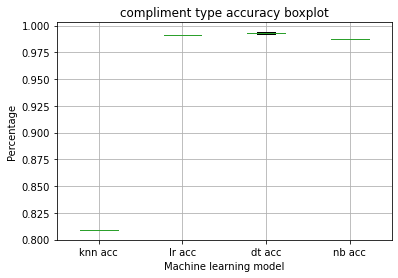

In [39]:
# Creating dataset

data1={'knn acc':knn1_acc,'lr acc':lr1_acc,'dt acc':dt1_accuracy,'nb acc':nb1_acc}

acc_data1=pd.DataFrame(data1)
boxplot = acc_data1.boxplot(column=['knn acc','lr acc','dt acc','nb acc']) 

# Adding title and labels
plt.xlabel("Machine learning model")
plt.ylabel("Percentage")
plt.title("compliment type accuracy boxplot")

# show plot
plt.show()

### product type accuracy box plot

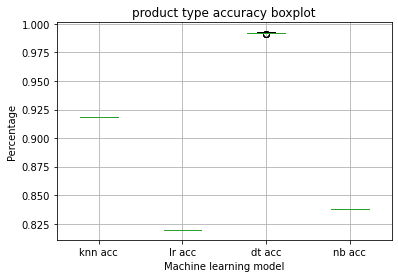

In [40]:
# Creating dataset

data2={'knn acc':knn2_acc,'lr acc':lr2_acc,'dt acc':dt2_accuracy,'nb acc':nb2_acc}

acc_data2=pd.DataFrame(data2)
boxplot = acc_data2.boxplot(column=['knn acc','lr acc','dt acc','nb acc']) 

# Adding title and labels
plt.xlabel("Machine learning model")
plt.ylabel("Percentage")
plt.title("product type accuracy boxplot")

# show plot
plt.show()

### complaint type precision box plot

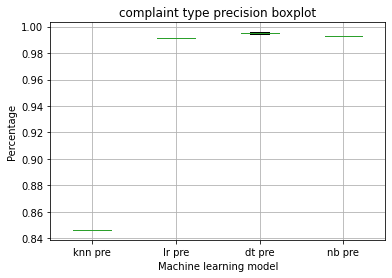

In [41]:
# Creating dataset

data1={'knn pre':knn1_pre,'lr pre':lr1_pre,'dt pre':dt1_precision,'nb pre':nb1_pre}

pre_data1=pd.DataFrame(data1)
boxplot = pre_data1.boxplot(column=['knn pre','lr pre','dt pre','nb pre']) 

# Adding title and labels
plt.xlabel("Machine learning model")
plt.ylabel("Percentage")
plt.title("complaint type precision boxplot")

# show plot
plt.show()

### product type precision box plot

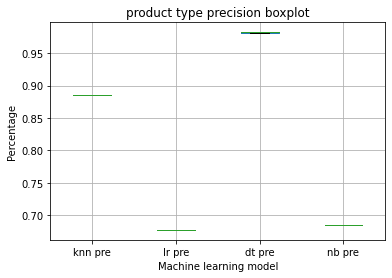

In [42]:
# Creating dataset

data2={'knn pre':knn2_pre,'lr pre':lr2_pre,'dt pre':dt2_precision,'nb pre':nb2_pre}

pre_data2=pd.DataFrame(data2)
boxplot = pre_data2.boxplot(column=['knn pre','lr pre','dt pre','nb pre']) 

# Adding title and labels
plt.xlabel("Machine learning model")
plt.ylabel("Percentage")
plt.title("product type precision boxplot")

# show plot
plt.show()

### complaint type recall box plot

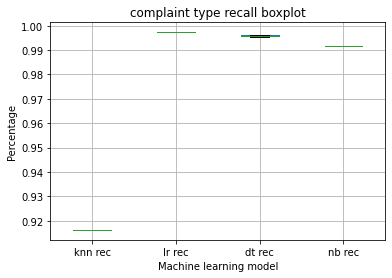

In [43]:
# Creating dataset

data1={'knn rec':knn1_rec,'lr rec':lr1_rec,'dt rec':dt1_recall,'nb rec':nb1_rec}
rec_data1=pd.DataFrame(data1)
boxplot = rec_data1.boxplot(column=['knn rec','lr rec','dt rec','nb rec'])

# Adding title and labels
plt.xlabel("Machine learning model")
plt.ylabel("Percentage")
plt.title("complaint type recall boxplot")

# show plot
plt.show()

### product type recall box plot

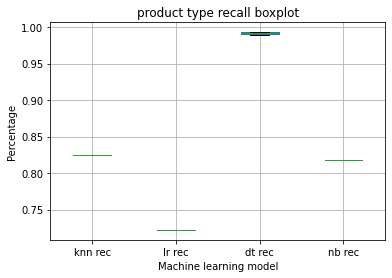

In [44]:
# Creating dataset

data2={'knn rec':knn2_rec,'lr rec':lr2_rec,'dt rec':dt2_recall,'nb rec':nb2_rec}
rec_data2=pd.DataFrame(data2)
boxplot = rec_data2.boxplot(column=['knn rec','lr rec','dt rec','nb rec'])

# Adding title and labels
plt.xlabel("Machine learning model")
plt.ylabel("Percentage")
plt.title("product type recall boxplot")

# show plot
plt.show()

### complaint type f1 score box plot

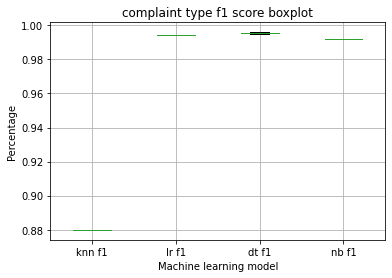

In [45]:
# Creating dataset

data1={'knn f1':knn1_f1,'lr f1':lr1_f1,'dt f1':dt1_f1,'nb f1':nb1_f1}
acc_data1=pd.DataFrame(data1)
boxplot = acc_data1.boxplot(column=['knn f1','lr f1','dt f1','nb f1'])

# Adding title and labels
plt.xlabel("Machine learning model")
plt.ylabel("Percentage")
plt.title("complaint type f1 score boxplot")

# show plot
plt.show()

### product type f1 score box plot

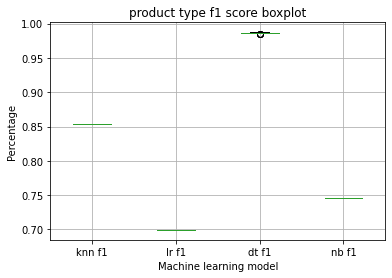

In [46]:
data2={'knn f1':knn2_f1,'lr f1':lr2_f1,'dt f1':dt2_f1,'nb f1':nb2_f1}
acc_data2=pd.DataFrame(data2)
boxplot = acc_data2.boxplot(column=['knn f1','lr f1','dt f1','nb f1'])

# Adding title and labels
plt.xlabel("Machine learning model")
plt.ylabel("Percentage")
plt.title("product type f1 score boxplot")

# show plot
plt.show()

### complaint type bar chart

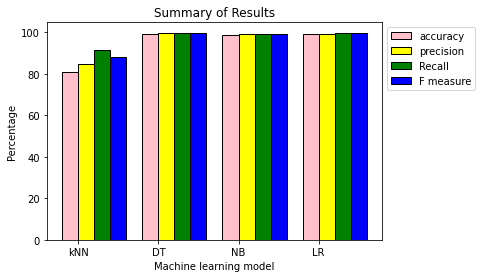

In [47]:
#for knn
knn1acc = sum(knn1_acc)/len(knn1_acc) *100
knn1pre = sum(knn1_pre)/len(knn1_pre) *100
knn1rec = sum(knn1_rec)/len(knn1_rec) *100
knnf1 = sum(knn1_f1)/len(knn1_f1) *100

# for lr
lr1acc = sum(lr1_acc)/len(lr1_acc) *100
lr1pre = sum(lr1_pre)/len(lr1_pre) *100
lr1rec = sum(lr1_rec)/len(lr1_rec) *100
lr1f1 = sum(lr1_f1)/len(lr1_f1) *100

# for naive bayes
nb1acc = sum(nb1_acc)/len(nb1_acc) *100
nb1pre = sum(nb1_pre)/len(nb1_pre) *100
nb1rec = sum(nb1_rec)/len(nb1_rec) *100
nb1f1 = sum(nb1_f1)/len(nb1_f1) *100

# for decision tree
dt1acc = sum(dt1_accuracy)/len(dt1_accuracy) *100
dt1pre = sum(dt1_precision)/len(dt1_precision) *100
dt1rec = sum(dt1_recall)/len(dt1_recall) *100
dt1f1 = sum(dt1_f1)/len(dt1_f1) *100


machine_learning_model_name = ['kNN','DT','NB','LR']
machine_learning_model_accuracy = [knn1acc,dt1acc,nb1acc,lr1acc]
machine_learning_model_precision = [knn1pre,dt1pre,nb1pre,lr1pre]
machine_learning_model_Recall = [knn1rec,dt1rec,nb1rec,lr1rec]
machine_learning_model_F_measure = [knnf1,dt1f1,nb1f1,lr1f1]
X_axis = np.arange(len(machine_learning_model_name ))
  

# creating the bar plot
plt.bar(X_axis+0.1, machine_learning_model_accuracy, color ='pink',width = 0.2,edgecolor = 'black',label = 'accuracy')
plt.bar(X_axis+0.3, machine_learning_model_precision, color ='yellow',width = 0.2,edgecolor = 'black',label = 'precision')
plt.bar(X_axis + 0.5, machine_learning_model_Recall, color ='green',width = 0.2,edgecolor = 'black',label = 'Recall')
plt.bar(X_axis + 0.7, machine_learning_model_F_measure, color ='blue',width = 0.2,edgecolor = 'black',label = 'F measure')
plt.xticks(X_axis+0.2, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))


plt.xlabel("Machine learning model")
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.show()

### product type bar chart

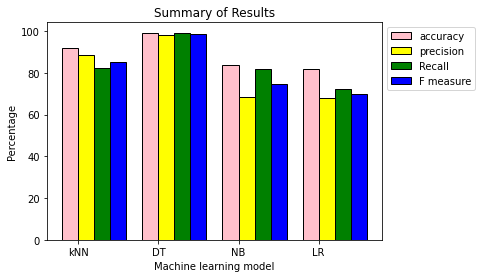

In [48]:
#for knn
knn2acc = sum(knn2_acc)/len(knn2_acc) *100
knn2pre = sum(knn2_pre)/len(knn2_pre) *100
knn2rec = sum(knn2_rec)/len(knn2_rec) *100
knn2f1 = sum(knn2_f1)/len(knn2_f1) *100

# for lr
lr2acc = sum(lr2_acc)/len(lr2_acc) *100
lr2pre = sum(lr2_pre)/len(lr2_pre) *100
lr2rec = sum(lr2_rec)/len(lr2_rec) *100
lr2f1 = sum(lr2_f1)/len(lr2_f1) *100

# for naive bayes
nb2acc = sum(nb2_acc)/len(nb2_acc) *100
nb2pre = sum(nb2_pre)/len(nb2_pre) *100
nb2rec = sum(nb2_rec)/len(nb2_rec) *100
nb2f1 = sum(nb2_f1)/len(nb2_f1) *100

# for decision tree
dt2acc = sum(dt2_accuracy)/len(dt2_accuracy) *100
dt2pre = sum(dt2_precision)/len(dt2_precision) *100
dt2rec = sum(dt2_recall)/len(dt2_recall) *100
dt2f1 = sum(dt2_f1)/len(dt2_f1) *100


machine_learning_model_name = ['kNN','DT','NB','LR']
machine_learning_model_accuracy = [knn2acc,dt2acc,nb2acc,lr2acc]
machine_learning_model_precision = [knn2pre,dt2pre,nb2pre,lr2pre]
machine_learning_model_Recall = [knn2rec,dt2rec,nb2rec,lr2rec]
machine_learning_model_F_measure = [knn2f1,dt2f1,nb2f1,lr2f1]
X_axis = np.arange(len(machine_learning_model_name ))
  

# creating the bar plot
plt.bar(X_axis+0.1, machine_learning_model_accuracy, color ='pink',width = 0.2,edgecolor = 'black',label = 'accuracy')
plt.bar(X_axis+0.3, machine_learning_model_precision, color ='yellow',width = 0.2,edgecolor = 'black',label = 'precision')
plt.bar(X_axis + 0.5, machine_learning_model_Recall, color ='green',width = 0.2,edgecolor = 'black',label = 'Recall')
plt.bar(X_axis + 0.7, machine_learning_model_F_measure, color ='blue',width = 0.2,edgecolor = 'black',label = 'F measure')
plt.xticks(X_axis+0.2, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))


plt.xlabel("Machine learning model")
plt.ylabel("Percentage")
plt.title("Summary of Results")
plt.show()

### complaint type radar chart

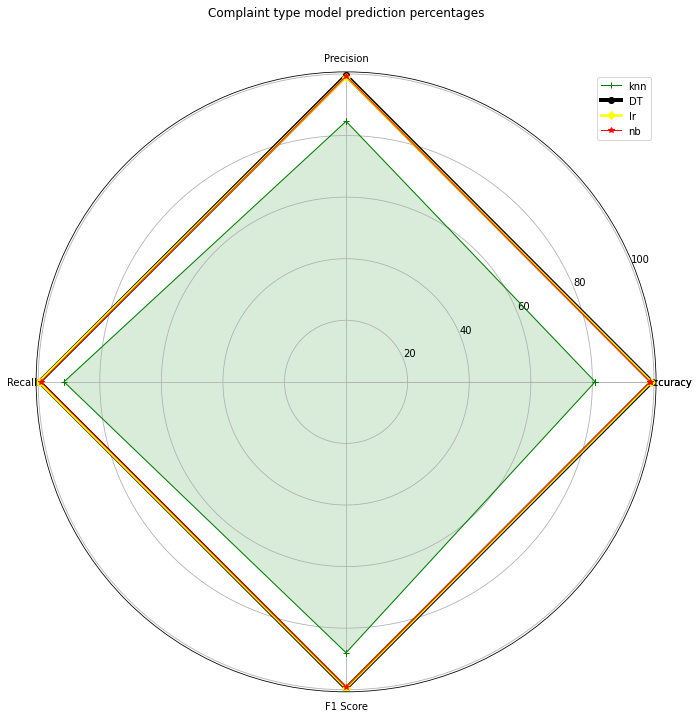

In [49]:
# for complaint type

#for knn
#the values are from the bar chart
knn = [knn1acc, knn1pre, knn1rec, knnf1]

# for lr
#the values are from the bar chart
lr = [lr1acc, lr1pre, lr1rec, lr1f1]

# for naive bayes
#the values are from the bar chart
nb = [nb1acc, nb1pre, nb1rec, nb1f1]

# for decision tree
#the values are from the bar chart
dt = [dt1acc, dt1pre, dt1rec, dt1f1]

# the categories

categories = ['Accuracy','Precision','Recall','F1 Score']

#Matplotlib uses the angles in radians for preparing polar plots. We can obtain the angles using linespace function of numpy as below.
angles=np.linspace(0,2*np.pi,len(categories), endpoint=False)

#add the first angle at the end of the array to completely describe the circle.
angles=np.concatenate((angles,[angles[0]]))

#Append the first value for all other arrays/lists used for visualization to maintain length consistency
categories.append(categories[0])
knn.append(knn[0])
dt.append(dt[0])
lr.append(lr[0])
nb.append(nb[0])

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, polar=True)

#knn Plot
ax.plot(angles,knn, '+-', color='g', linewidth=1, label='knn')
ax.fill(angles, knn, alpha=0.15, color='g')

#dt Plot
ax.plot(angles,dt, 'o-', color='black', linewidth=4, label='DT')
#ax.fill(angles, dt, alpha=0.25, color='#0ff5ee')

#lr Plot
ax.plot(angles,lr, 'D-', color='yellow', linewidth=2.5, label='lr')
#ax.fill(angles, lr, alpha=0.25, color='#d775ff')

#nb Plot
ax.plot(angles,nb, '*-', color='red', linewidth=1, label='nb')
#ax.fill(angles, nb, alpha=0.25, color='#CCCCFF')

ax.set_title('Complaint type model prediction percentages',y=1.08)

ax.set_thetagrids(angles * 180/np.pi, categories)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### product type radar chart

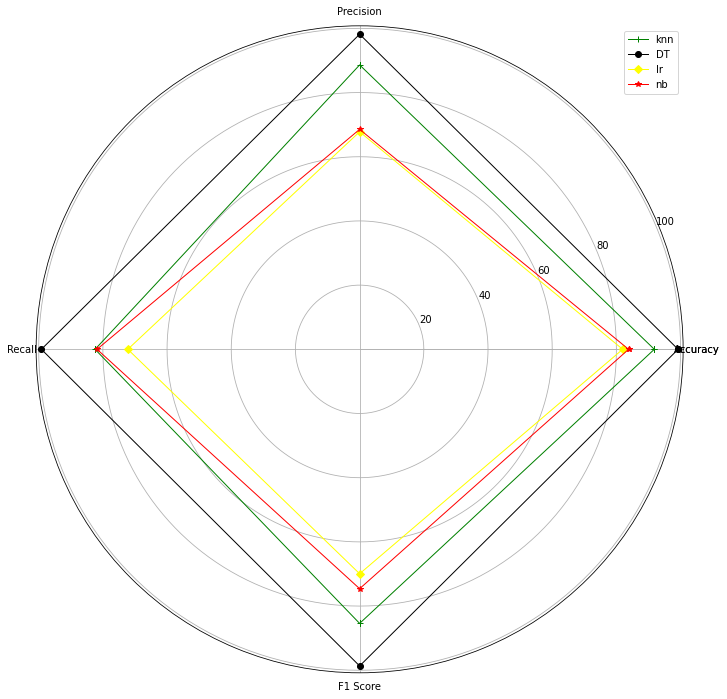

In [50]:
# for product type

#for knn
#the values are from the bar chart
knn = [knn2acc, knn2pre, knn2rec, knn2f1]

# for lr
#the values are from the bar chart
lr = [lr2acc, lr2pre, lr2rec, lr2f1]

# for naive bayes
#the values are from the bar chart
nb = [nb2acc, nb2pre, nb2rec, nb2f1]

# for decision tree
#the values are from the bar chart
dt = [dt2acc, dt2pre, dt2rec, dt2f1]

# the categories

categories = ['Accuracy','Precision','Recall','F1 Score']

#Matplotlib uses the angles in radians for preparing polar plots. We can obtain the angles using linespace function of numpy as below.
angles=np.linspace(0,2*np.pi,len(categories), endpoint=False)

#add the first angle at the end of the array to completely describe the circle.
angles=np.concatenate((angles,[angles[0]]))

#Append the first value for all other arrays/lists used for visualization to maintain length consistency
categories.append(categories[0])
knn.append(knn[0])
dt.append(dt[0])
lr.append(lr[0])
nb.append(nb[0])

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111, polar=True)

#knn Plot
ax.plot(angles,knn, '+-', color='g', linewidth=1, label='knn')
#ax.fill(angles, knn, alpha=0.15, color='g')

#dt Plot
ax.plot(angles,dt, 'o-', color='black', linewidth=1, label='DT')
#ax.fill(angles, dt, alpha=0.25, color='#0ff5ee')

#lr Plot
ax.plot(angles,lr, 'D-', color='yellow', linewidth=1, label='lr')
#ax.fill(angles, lr, alpha=0.25, color='#d775ff')

#nb Plot
ax.plot(angles,nb, '*-', color='red', linewidth=1, label='nb')
#ax.fill(angles, nb, alpha=0.25, color='#CCCCFF')


ax.set_thetagrids(angles * 180/np.pi, categories)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()